In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

print(f"Python version: {sys.version.split()[0]}")

# magic word for producing visualizations in notebook
%matplotlib inline

Python version: 3.11.7


In [10]:
# load csv
df = pd.read_csv('data/slice_output.csv')

In [11]:
# filtering for:
# feature = education &
# count > 300
df_edu = df[(df['feature'] == 'education') & (df['count'] > 300)].copy()

df_edu

,feature,slice_value,count,precision,recall,f1
17,education,Bachelors,1053,0.809816,0.293333,0.430669
19,education,HS-grad,2085,0.611570,0.214493,0.317597
20,education,Masters,369,0.861111,0.299517,0.444444
23,education,Some-college,1485,0.625000,0.234657,0.341207


In [15]:
df_edu['slice_value'].count()

4

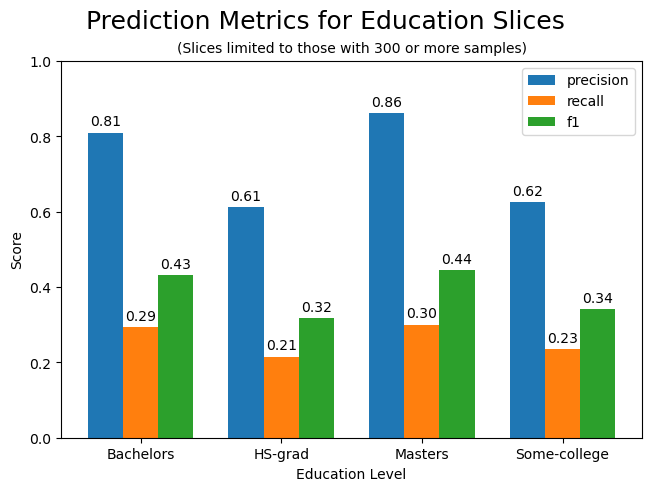

In [50]:
x = np.arange(df_edu['slice_value'].count())  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for metric, metrics in df_edu[['precision', 'recall', 'f1']].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, metrics, width, label=metric)
    ax.bar_label(rects, padding=3, fmt='{:.2f}')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.suptitle('Prediction Metrics for Education Slices', fontsize=18)
plt.title('(Slices limited to those with 300 or more samples)', fontsize=10)
ax.set_ylabel('Score')
ax.set_xlabel('Education Level')
ax.set_xticks(x + width, df_edu['slice_value'])
ax.legend()
ax.set_ylim(0, 1)

plt.show()

In [52]:
print(df_edu['slice_value'])

17       Bachelors
19         HS-grad
20         Masters
23    Some-college
Name: slice_value, dtype: object


17       Bachelors
19         HS-grad
Masters
Some-college